# Frequent Hashtags (Bar Chart) 

In [77]:
%matplotlib inline

from __future__ import division, print_function
from operator import itemgetter
import matplotlib.pyplot as plt; plt.rcdefaults()
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
from ggplot import *
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D 
from scipy.misc import imread
from math import log
from IPython.display import display
import numpy as np 
import itertools
import json
import math
import re
import csv
import string

#Imports NBA player list
with open("players.json") as f:
    players = json.load(f)

#Removes players with no twitter account
has_twitter=[]
for i in range(0,len(players)):
    if players[i]!=[]:
        has_twitter.append(players[i])
players=has_twitter

with open("players_R.json", "w") as f:
    json.dump(players, f, indent=4, sort_keys=True)
    
#Creates dictionary of screen_name:[player_name,team]
with open('tweet_account_final.csv', mode='r') as infile:
    reader = csv.reader(infile)
    mydict = {rows[1]:[rows[0],rows[2]] for rows in reader}

In [78]:
#Creates list of lists of hashtags by each player
all_hashtags=[[tweet["entities"]["hashtags"] for tweet in tl] for tl in players]

#Mashes all hashtags into a list and a set
hashtags=['']*len(players)
for i in range(0,len(all_hashtags)):
    for j in range(0,len(all_hashtags[i])):
        for k in range(0,len(all_hashtags[i][j])):
            hashtags[i]=hashtags[i]+" "+all_hashtags[i][j][k]["text"]
hashtags=[hashtag.lower() for hashtag in hashtags]
hashtags=" ".join(hashtags).split()
unique_hashtags=sorted(set(hashtags))

#Finds the most frequent hashtags and sorts them  
frequent_hashtags = [(h,hashtags.count(h)) for h in unique_hashtags if hashtags.count(h) > 50]
frequent_hashtags=sorted(frequent_hashtags,key=lambda x: x[1],reverse=True)
most_freq=[frequent_hashtags[i][0] for i in range(0,10)]
most_freq_count=[frequent_hashtags[i][1] for i in range(0,10)]


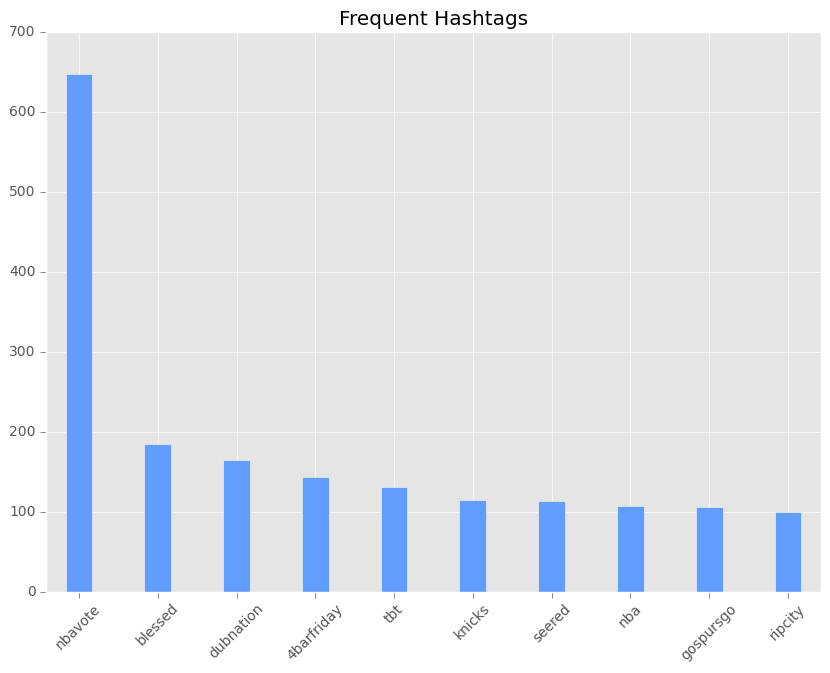

In [81]:
plt.style.use('ggplot')

x=most_freq_count
y=most_freq
data={'Frequent Hashtags' : pd.Series(most_freq_count,index=most_freq)}
df=pd.DataFrame(data)

width = 0.34      # the width of the bars
fig, ax = plt.subplots(nrows=1, ncols=1)

df.plot(kind='bar', width=.34,ax=ax, figsize=(10, 7), title="Frequent Hashtags",legend=False,color="#619CFF",sort_columns=True)
plt.xticks(rotation=45)
plt.tick_params(axis='both',which='both',top='off',right='off')
plt.savefig('./freqhashtags.png', dpi=300)
plt.show()


# Frequent Hashtag Pairs (Arc Plot)

In [82]:
#Creates a list of (player_index,num_followers), sorted by number of followers
def pop_rank(players):
    index_pop=[]
    for i in range(0,len(players)):
        if len(players[i])!=0:
            index_pop.append((i,players[i][0]["user"]["followers_count"]))
    index_pop=sorted(index_pop,key=lambda x: x[1])
    return(index_pop)

index_pop=pop_rank(players)
most_pop=index_pop[-1:-11:-1]

#[index in players list, screen_name, num_followers, num_tweets, num_hashtags]
most_pop_players=[]
for i in range(0,len(most_pop)):
    most_pop_players.append([most_pop[i][0],players[most_pop[i][0]][0]["user"]["screen_name"],most_pop[i][1],
                           len(players[most_pop[i][0]]),len(hashtags[most_pop[i][0]].split())])

In [83]:
targets = [t[0] for t in most_pop_players][0:5]

In [84]:
hashtags=[]
for i in targets:
    for j in range(0,len(players[i])):
        tweet_list=[]
        if players[i][j]["entities"]["hashtags"] != None: 
            for k in range(0,len(players[i][j]["entities"]["hashtags"])):
                tweet_list.append(players[i][j]["entities"]["hashtags"][k]["text"].lower())
        hashtags.append(tweet_list)
        

In [85]:
hashtags=[hashtag for hashtag in hashtags if hashtag]

In [86]:
mylist=[]
for i in range(0,len(hashtags)):
    mylist.append([','.join(x) for x in itertools.combinations(hashtags[i],2)])


In [87]:
mylist = [t for t in mylist if t]
tmp = [';'.join(player) for player in mylist]
outresult = ';'.join(tmp).split(';')

In [88]:
newlist=[]
removal = ["legend","cannon","brucelee75","mojobackpacks","alvinmovie","carmeloanthonyfoundation","trainwreck",
           "shapeyourlegacy","goodnight","trickortreat","hookem","wings","rip","oneofakind","highlights",
           "voiceofthegame","generationali","warcraftmovie","ad","starwarsbattlefront","letsplaystarwars"]
for h in outresult:
    to_append=h.split(",")
    if to_append[0] not in removal and to_append[1] not in removal:
        newlist.append(to_append)
len(newlist)
outresult=newlist

In [89]:
with open("hashtags.csv","w") as file:
    csv_out=csv.writer(file)
    for h in outresult:
        csv_out.writerow(h)